### Data Preparation

The dataset contains around 2500 images of bees and around 2100 images of wasps. 

The dataset contains separate folders for training and test sets. 


### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a convolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation 
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

For clarification about kernel size and max pooling, check [Office Hours](https://www.youtube.com/watch?v=1WRgdBTUaAc).

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img


2023-11-12 08:18:44.183154: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


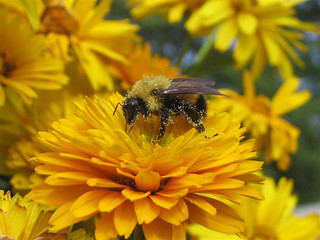

In [2]:
load_img("data/train/bee/2984293_b650d46745_n.jpg")

In [3]:
model = keras.Sequential()

model.add(keras.Input(shape=(150, 150, 3)))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))


2023-11-12 08:18:45.904708: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 08:18:45.911127: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 08:18:45.911372: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 08:18:45.911776: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [4]:
opt = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
loss = keras.losses.BinaryCrossentropy()
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

* `mean squared error`
* **`binary crossentropy`**
* `categorical crossentropy`
* `cosine similarity`

> **Note:** since we specify an activation for the output layer, we don't need to set `from_logits=True`

### Question 2

What's the number of parameters in the convolutional layer of our model? You can use the `summary` method for that. 

* 1 
* 65
* **896**
* 11214912

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

### Generators and Training

For the next two questions, use the following data generator for both train and test sets:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/test directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets. 

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

In [6]:
data_gen = ImageDataGenerator(rescale=1./255)

train_generator = data_gen.flow_from_directory(
    './data/train',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True
)

Found 3677 images belonging to 2 classes.


In [7]:
test_generator = data_gen.flow_from_directory(
    './data/test/',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True
)

Found 918 images belonging to 2 classes.


In [8]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10


2023-11-12 08:18:48.054828: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-12 08:18:48.683882: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-12 08:18:48.684771: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-12 08:18:48.684804: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-12 08:18:48.685760: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-12 08:18:48.685829: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


184/184 [==============================] - 11s 46ms/step - loss: 0.6846 - accuracy: 0.5450 - val_loss: 0.6627 - val_accuracy: 0.5381
Epoch 2/10
184/184 [==============================] - 8s 45ms/step - loss: 0.6554 - accuracy: 0.6005 - val_loss: 0.6167 - val_accuracy: 0.6765
Epoch 3/10
184/184 [==============================] - 8s 45ms/step - loss: 0.6142 - accuracy: 0.6620 - val_loss: 0.5696 - val_accuracy: 0.7004
Epoch 4/10
184/184 [==============================] - 8s 45ms/step - loss: 0.5605 - accuracy: 0.7144 - val_loss: 0.5587 - val_accuracy: 0.7092
Epoch 5/10
184/184 [==============================] - 8s 45ms/step - loss: 0.5378 - accuracy: 0.7397 - val_loss: 0.5489 - val_accuracy: 0.7124
Epoch 6/10
184/184 [==============================] - 8s 44ms/step - loss: 0.5108 - accuracy: 0.7656 - val_loss: 0.6059 - val_accuracy: 0.6797
Epoch 7/10
184/184 [==============================] - 8s 45ms/step - loss: 0.4895 - accuracy: 0.7683 - val_loss: 0.5483 - val_accuracy: 0.7298
Epoch 8/1

### Question 3

What is the median of training accuracy for all the epochs for this model?

* 0.20
* 0.40
* 0.60
* **0.80**

In [17]:
import statistics
train_acc = history.history['accuracy']
statistics.median(train_acc)

0.7526516020298004

### Question 4

What is the standard deviation of training loss for all the epochs for this model?

* 0.031
* 0.061
* **0.091**
* 0.131

In [18]:
train_loss = history.history['loss']
statistics.stdev(train_loss)

0.08935156795364722

### Data Augmentation

For the next two questions, we'll generate more data using data augmentations. 

Add the following augmentations to your training data generator:

* `rotation_range=50,`
* `width_shift_range=0.1,`
* `height_shift_range=0.1,`
* `zoom_range=0.1,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`

In [19]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = data_gen.flow_from_directory(
    './data/train',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True
)

Found 3677 images belonging to 2 classes.


### Question 5 

Let's train our model for 10 more epochs using the same code as previously.
> **Note:** make sure you don't re-create the model - we want to continue training the model
we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

* 0.18
* **0.48**
* 0.78
* 0.108

In [20]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
184/184 [==============================] - 23s 125ms/step - loss: 0.5042 - accuracy: 0.7593 - val_loss: 0.4865 - val_accuracy: 0.7734
Epoch 2/10
184/184 [==============================] - 23s 125ms/step - loss: 0.4939 - accuracy: 0.7686 - val_loss: 0.4822 - val_accuracy: 0.7603
Epoch 3/10
184/184 [==============================] - 23s 127ms/step - loss: 0.4853 - accuracy: 0.7764 - val_loss: 0.4913 - val_accuracy: 0.7745
Epoch 4/10
184/184 [==============================] - 23s 126ms/step - loss: 0.4809 - accuracy: 0.7784 - val_loss: 0.5239 - val_accuracy: 0.7462
Epoch 5/10
184/184 [==============================] - 24s 128ms/step - loss: 0.4819 - accuracy: 0.7808 - val_loss: 0.4917 - val_accuracy: 0.7691
Epoch 6/10
184/184 [==============================] - 24s 128ms/step - loss: 0.4776 - accuracy: 0.7854 - val_loss: 0.4937 - val_accuracy: 0.7593
Epoch 7/10
184/184 [==============================] - 23s 127ms/step - loss: 0.4643 - accuracy: 0.7911 - val_loss: 0.4589 - val_ac

In [24]:
val_loss = history.history['val_loss']
statistics.mean(val_loss)

0.47864679992198944

### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?

* 0.38
* 0.58
* **0.78**
* 0.98

In [25]:
val_acc = history.history['val_accuracy']
statistics.mean(val_acc[-5:])

0.7827886700630188